In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import argparse
import torch
import cv2 as cv
import logging
from pkg_resources import parse_requirements

from exp_runner import Runner

In [12]:
img_fine = torch.rand(20, 30, 3)
true_rgb = torch.rand(20, 30, 3)
mask = torch.rand(20, 30, 1)
mask[mask < 0.5] = 0
mask[mask >= 0.5] = 1
print(mask.sum())

# after
psnr = 20.0 * torch.log10(255.0 / (((img_fine - true_rgb) ** 2).sum() / mask.sum()*3).sqrt())
print(psnr)

# before
psnr = 20.0 * torch.log10(255.0 / ((img_fine - true_rgb) ** 2).mean().sqrt())
print(psnr)

tensor(315.)
tensor(43.6053)
tensor(55.9461)


In [2]:
def plot_cameras(poses, scale=0.5):
    camera_centers = poses[:, :3, 3]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Cartesian axes
    ax.quiver(0, 0, 0, 1, 0, 0, length=scale*2, color='r')
    ax.quiver(0, 0, 0, 0, 1, 0, length=scale*2,color='g')
    ax.quiver(0, 0, 0, 0, 0, 1, length=scale*2,color='b')
    ax.text(0, 0, 0, 'w')

    for i, T_c_0 in enumerate(poses):
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 0], T_c_0[1, 0], T_c_0[2, 0], length=scale, color='r')
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 1], T_c_0[1, 1], T_c_0[2, 1], length=scale, color='g')
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 2], T_c_0[1, 2], T_c_0[2, 2], length=scale, color='b')
        ax.text(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], str(i))

    axis_min_lim = np.min(camera_centers)
    axis_max_lim = np.max(camera_centers)
    ax.set_xlim([axis_min_lim, axis_max_lim])
    ax.set_ylim([axis_min_lim, axis_max_lim])
    ax.set_zlim([axis_min_lim, axis_max_lim])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

DTU

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--dataset_type', type=str, default='dtu')
parser.add_argument('--conf', type=str, default='./confs/womask.conf')
parser.add_argument('--case', type=str, default='')
parser.add_argument('--mode', type=str, default='validate_mesh')
parser.add_argument('--from_latest', default=False, action="store_true")

args = parser.parse_args(["--dataset_type", "dtu", "--case", "lego_colmap"])

runner = Runner(args.conf, args.dataset_type, args.mode, args.case, args.from_latest)

images = runner.dataset.images
masks = runner.dataset.masks
poses = runner.dataset.pose_all

print('Loaded dtu')
print("images shape:", images.shape, "device:", images.device)
print("masks shape:", masks.shape, "device:", masks.device)
print("poses shape:", poses.shape, "device:", poses.device)
print("intrinsics_all shape:", runner.dataset.intrinsics_all.shape)
print("intrinsics_all_inv shape:", runner.dataset.intrinsics_all_inv.shape)
print("focal val:", runner.dataset.focal.item(), "device:", runner.dataset.focal.device)

poses = poses.cpu().numpy()

Load data: Begin
Load data: End
Loaded dtu
images shape: torch.Size([100, 800, 800, 3]) device: cpu
masks shape: torch.Size([100, 800, 800, 3]) device: cpu
poses shape: torch.Size([100, 4, 4]) device: cuda:0
intrinsics_all shape: torch.Size([100, 4, 4])
intrinsics_all_inv shape: torch.Size([100, 4, 4])
focal val: 1106.4757080078125 device: cuda:0


In [4]:
runner.dataset.intrinsics_all[0]

tensor([[1.1065e+03, 5.5507e-05, 3.9950e+02, 0.0000e+00],
        [0.0000e+00, 1.1065e+03, 3.9950e+02, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]], device='cuda:0')

In [5]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print("POSE:")
    print(poses[idx])
    print("MASK min:", torch.min(masks[0]), "max:", torch.max(masks[0]))
    # img = cv.cvtColor(images[idx], cv.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10, 10))
    # two subplots on one row
    plt.subplot(1, 2, 1)
    plt.imshow(images[idx])
    plt.subplot(1, 2, 2)
    plt.imshow(masks[0], cmap='gray')
    

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

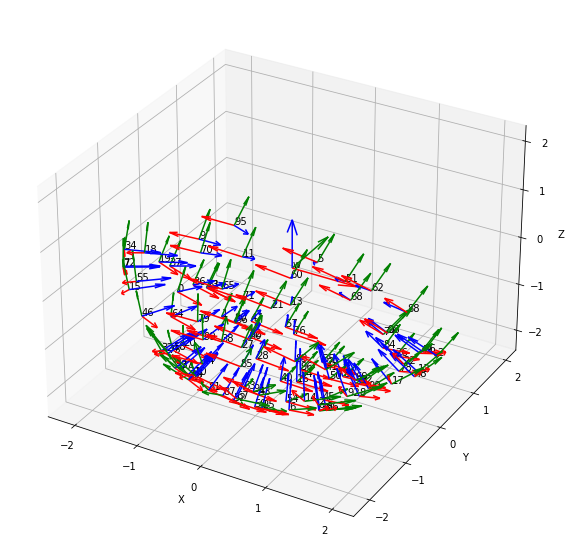

In [6]:
plot_cameras(poses, scale=0.5)

In [7]:
points = poses[:, :3, 3]
np.linalg.norm(points, axis=1)

array([2.3019762, 2.3171532, 2.4350185, 2.2884474, 2.2982113, 2.4237292,
       2.3447447, 2.298013 , 2.3807282, 2.3683014, 2.315224 , 2.3888407,
       2.4202788, 2.4025202, 2.368839 , 2.3058057, 2.3398468, 2.4143136,
       2.3302743, 2.306258 , 2.2935283, 2.3909423, 2.4296665, 2.3719473,
       2.307743 , 2.331696 , 2.4039066, 2.359992 , 2.3229346, 2.3579404,
       2.3688025, 2.3097925, 2.3250089, 2.2975166, 2.3034256, 2.3561935,
       2.311574 , 2.3061736, 2.351776 , 2.3666644, 2.3315659, 2.394481 ,
       2.303689 , 2.3462496, 2.3303714, 2.357255 , 2.2861898, 2.329858 ,
       2.4219189, 2.4212916, 2.360143 , 2.4323769, 2.3193426, 2.294313 ,
       2.3363574, 2.316318 , 2.3666015, 2.3470218, 2.290318 , 2.327867 ,
       2.408192 , 2.318369 , 2.4419763, 2.3158376, 2.2950263, 2.3705735,
       2.423495 , 2.3283188, 2.4298773, 2.4024189, 2.3665276, 2.3794093,
       2.2972634, 2.318479 , 2.4356008, 2.3085365, 2.3488052, 2.2937596,
       2.4054542, 2.34488  , 2.3212469, 2.3061044, 

NeRF Synthetic

In [16]:
parser = argparse.ArgumentParser()
parser.add_argument('--dataset_type', type=str, default='dtu')
parser.add_argument('--conf', type=str, default='./confs/womask.conf')
parser.add_argument('--case', type=str, default='')
parser.add_argument('--mode', type=str, default='validate_mesh')
parser.add_argument('--from_latest', default=False, action="store_true")

args = parser.parse_args(["--dataset_type", "blender", "--case", "lego"])

runner = Runner(args.conf, args.dataset_type, args.mode, args.case, args.from_latest)

images = runner.dataset.images
masks = runner.dataset.masks
poses = runner.dataset.pose_all

print('Loaded blender')
print("images shape:", images.shape, "device:", images.device)
print("masks shape:", masks.shape, "device:", masks.device)
print("poses shape:", poses.shape, "device:", poses.device)
print("intrinsics_all shape:", runner.dataset.intrinsics_all.shape)
print("intrinsics_all_inv shape:", runner.dataset.intrinsics_all_inv.shape)
print("focal val:", runner.dataset.focal.item(), "device:", runner.dataset.focal.device)

poses = poses.cpu().numpy()

Load data: Begin
Load data: End
Loaded blender
images shape: torch.Size([100, 800, 800, 3]) device: cpu
masks shape: torch.Size([100, 800, 800, 1]) device: cpu
poses shape: torch.Size([100, 4, 4]) device: cuda:0
intrinsics_all shape: torch.Size([100, 4, 4])
intrinsics_all_inv shape: torch.Size([100, 4, 4])
focal val: 1111.1110311937682 device: cuda:0


In [17]:
runner.dataset.intrinsics_all[0]

tensor([[1.1111e+03, 0.0000e+00, 4.0000e+02, 0.0000e+00],
        [0.0000e+00, 1.1111e+03, 4.0000e+02, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]], device='cuda:0')

In [18]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print("POSE:")
    print(poses[idx])
    print("MASK min:", torch.min(masks[0]), "max:", torch.max(masks[0]))
    # img = cv.cvtColor(images[idx], cv.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10, 10))
    # two subplots on one row
    plt.subplot(1, 2, 1)
    plt.imshow(images[idx])
    plt.subplot(1, 2, 2)
    plt.imshow(masks[idx], cmap='gray')

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

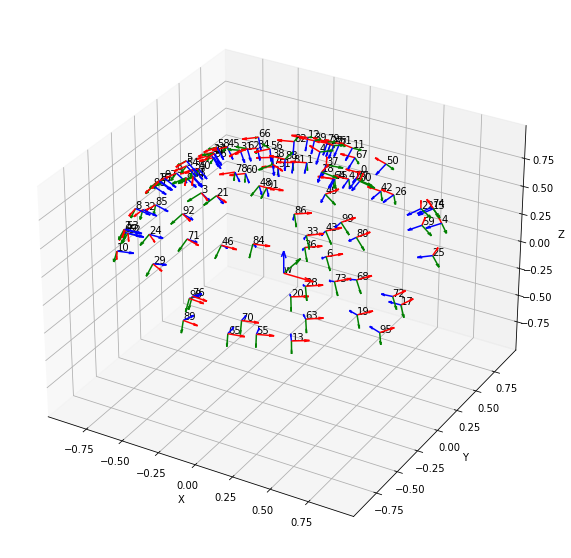

In [19]:
plot_cameras(poses, scale=0.1)

In [20]:
points = poses[:, :3, 3]
np.linalg.norm(points, axis=1)

array([0.99999994, 0.99999994, 0.99999994, 1.        , 0.99999994,
       1.        , 0.99999994, 1.        , 1.        , 0.99999994,
       0.99999994, 1.        , 0.99999994, 0.99999994, 0.99999994,
       1.        , 1.        , 1.        , 0.99999994, 0.99999994,
       1.        , 1.        , 0.99999994, 0.99999994, 0.99999994,
       1.        , 0.99999994, 0.99999994, 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 0.99999994, 0.99999994, 1.        ,
       0.99999994, 1.        , 0.99999994, 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 0.99999994,
       0.99999994, 0.99999994, 1.        , 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 1.        , 0.99999994, 1.        ,
       0.99999994, 0.99999994, 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 1.        , 0.99999994, 0.99999994,
       1.        , 1.        , 0.99999994, 0.99999994, 0.99999